## Explorative Data Analysis for Shoprite Data

Objectives

1. Total number of products
2. count of products by catgories
2. Total categories
3. Total price by Categories
4. Top 5 most expensive Products
5. Top 5 most Expensive categories

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
clean_df = pd.read_csv('shoprite_clean_data.csv')

In [3]:
clean_df.head()

,Unnamed: 0,names,prices,categories,tag
0,0,Chewy Caramel Alpenliebe 6.5G,34.99,Confectionery and Snacks,Candy
1,1,Milk Chewy Caramel Alpenliebe 6.5G,34.99,Candy & bubble Gum,Alpenliebe
2,2,Seasoning Powder Jollof Maggi 8G,52.99,"Condiments, Oils & Spices",Seasoning
3,3,Seasoning Powder Chicken Maggi 10G,52.99,"Condiments, Oils & Spices",Seasoning
4,4,Chocolate Slab Milk Dune 5G,54.99,Chocolate,Chocolate


In [4]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  131 non-null    int64  
 1   names       131 non-null    object 
 2   prices      131 non-null    float64
 3   categories  131 non-null    object 
 4   tag         131 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.2+ KB


In [5]:
clean_df.drop(columns="Unnamed: 0", inplace=True)

In [6]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       131 non-null    object 
 1   prices      131 non-null    float64
 2   categories  131 non-null    object 
 3   tag         131 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.2+ KB


#### Total number of products

In [7]:
num_of_products =len(clean_df['names'].unique())

print(f"There are {num_of_products} unique products in the dataset.")

There are 89 unique products in the dataset.


#### count of products by catgories

In [8]:
clean_df['categories'].unique()

array(['Confectionery and Snacks', 'Candy & bubble Gum',
       'Condiments, Oils & Spices', 'Chocolate', 'Biscuits & Cookies',
       'Water', 'Hot Drinks and UHT Milk', 'Savoury', 'Milk',
       'Canned Foods', 'HotCoco', 'Yoghurt', 'Carbonated Juices', 'Juice',
       'Biscuits & Cookies, Confectionery and Snacks',
       'Rice, Grains & Pasta', 'Food', 'Soda & Energy drink', 'Cereals',
       'Bakery', 'Kitchen', 'Hot Drinks and UHT Milk, Milk'], dtype=object)

In [9]:
clean_df.groupby("categories")["names"].count().sort_values(ascending=False)

categories
Biscuits & Cookies                              21
Carbonated Juices                               16
Water                                            9
Canned Foods                                     8
Rice, Grains & Pasta                             7
Soda & Energy drink                              6
Milk                                             6
Juice                                            6
Food                                             6
Hot Drinks and UHT Milk                          5
HotCoco                                          5
Yoghurt                                          5
Confectionery and Snacks                         5
Condiments, Oils & Spices                        5
Biscuits & Cookies, Confectionery and Snacks     5
Candy & bubble Gum                               4
Cereals                                          3
Savoury                                          3
Chocolate                                        2
Bakery              

In [10]:
# top 5
clean_df.groupby("categories")["names"].count().sort_values(ascending=False)[:5]


categories
Biscuits & Cookies      21
Carbonated Juices       16
Water                    9
Canned Foods             8
Rice, Grains & Pasta     7
Name: names, dtype: int64

In [12]:

top_5_products_by_category = clean_df.groupby("categories")["names"].count().sort_values(ascending=False)[:5]

top_5_products_by_category

categories
Biscuits & Cookies      21
Carbonated Juices       16
Water                    9
Canned Foods             8
Rice, Grains & Pasta     7
Name: names, dtype: int64

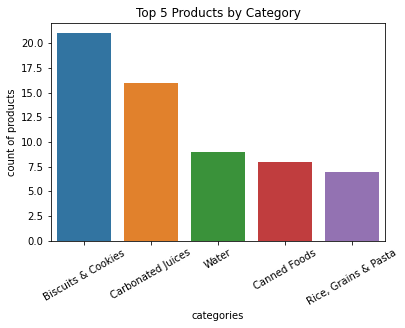

In [13]:
# # Visualize
x_axis = top_5_products_by_category.index
y_axis = top_5_products_by_category.values
sns.barplot(x=x_axis, y=y_axis)
plt.title('Top 5 Products by Category')
plt.xlabel("categories")
plt.ylabel('count of products')
plt.xticks(rotation=30)
plt.show()

#### Total categories

In [15]:
tot_categories =len(clean_df['categories'].unique())

tot_categories

22

#### Total price by Categories

In [20]:
tot_price_by_categories= clean_df.groupby("categories")["prices"].count().sort_values(ascending=False)[:5]

tot_price_by_categories

categories
Biscuits & Cookies      21
Carbonated Juices       16
Water                    9
Canned Foods             8
Rice, Grains & Pasta     7
Name: prices, dtype: int64

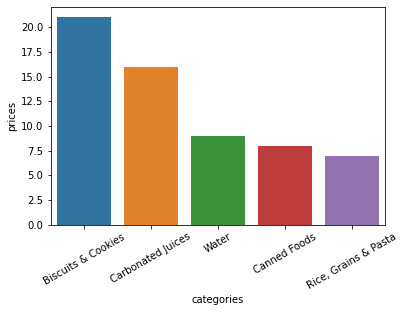

In [21]:
x_axis = tot_price_by_categories.index
y_axis = tot_price_by_categories.values
sns.barplot(x=x_axis, y=y_axis)
plt.title('')
plt.xlabel("categories")
plt.ylabel('prices')
plt.xticks(rotation=30)
plt.show()

 most expensive Products

In [24]:
clean_df['names'].unique()

array(['Chewy Caramel Alpenliebe 6.5G\xa0',
       'Milk Chewy Caramel Alpenliebe 6.5G',
       'Seasoning Powder Jollof Maggi 8G',
       'Seasoning Powder Chicken Maggi 10G',
       'Chocolate Slab Milk Dune 5G', 'Haansbro 39G Malt & Milk',
       'Mcvities 16G Crackers', 'Mcvities 17.5G Tea\xa0\xa0',
       'Water Still Bigi 750Ml', 'Biscuits Nice Coconut Haansbro 57G',
       'Biscuits Noreos Choc Hansbro 30G', 'Biscuits Power Up 50G',
       'Crispy Nutzy Peanut 50G\xa0', 'Chocolate Cowbell 20G',
       'Biscuits Digestive Oxford 30G', 'Snack Peanut Crispy Nutzy 50G',
       'Milk Powder Avantage Kerrygold 12G Sachet',
       'Tomato Paste Reg Chain Mix Vitali 70G',
       'Water Still Aquafina 750ML Bottle', 'Active Go Milo 20G',
       'Tomato Paste Pepper Vitapepe 70G Sachet',
       'Water Still Aquafina 500Ml Bottle',
       'Yoghurt Drink Hollandia 90Ml, Plain',
       'Yoghurt Drink Hollandia 90Ml, Strawberry',
       'Water (0.75L) Eva 750Ml Bottle', 'Bournvita Cadbury 20G

In [29]:
top_10_products=clean_df.groupby("names")["prices"].count().sort_values(ascending=False)

top_10_products

names
Water (0.75L) Eva 750Ml Bottle        3
Active Go Milo 20G                    2
Snack Peanut Crispy Nutzy 50G         2
Malt 3In1 Ovaltine 27G Sachet         2
Mcvities 16G Crackers                 2
                                     ..
Noodles Tasty Chicken Supreme 100G    1
Oats Quaker 40G Sachet                1
Original Sprite 350Ml Nrb             1
Hot Choc 3In1 Cadbury 30G             1
Milk Powder Full Cream Peak 16G       1
Name: prices, Length: 89, dtype: int64